<a href="https://colab.research.google.com/github/kostya200301/HimoInfo/blob/main/hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 7.6 MB/s eta 0:00:00


In [5]:
!pip install torch

In [6]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
# from torch.optim.lr_scheduler import ReducelROnPlateau

In [7]:
df = pd.read_excel("/content/1400.xlsx")

In [8]:
df['S_leng'] = df['SMILES'].str.len()

In [9]:
# Индекс селективности (ИС) - это отношение дозы, при использовании которой урожай снижается лишь незначительно, к дозе, уничтожающей большую часть сорных растений
df['SI'] = df['CC50-MDCK, mmg/ml']/df['IC50, mmg/ml']

In [10]:
df

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures,S_leng
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0,35
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0,35
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0,41
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0,39
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0,44
...,...,...,...,...,...,...,...,...,...,...,...
1463,CHEMBL4251117,7.3,530.6,72.684932,238.330,3,0,39.44,CCCCCCCc1c(OC)c(C)c(=O)oc1,NaN,26
1464,CHEMBL4217515,3.8,4733.9,1245.763158,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,NaN,67
1465,CHEMBL4205814,0.3,4733.9,15779.666667,427.417,2,1,124.74,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,NaN,65
1466,CHEMBL4212064,0.7,3662.8,5232.571429,320.304,1,0,89.49,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,NaN,53


In [ ]:
df.describe()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,Pictures,S_leng
count,1468.000000,1468.000000,1.468000e+03,1468.000000,1468.000000,1468.000000,1468.000000,727.000000,1468.000000
mean,50.277063,186.491530,2.210854e+04,384.739636,3.831744,1.333787,81.273215,364.909216,62.997956
std,92.184768,1009.454293,4.771268e+05,153.164268,2.860473,1.803663,54.078778,210.154325,32.373175
min,0.000010,0.031928,3.616134e-02,110.157000,0.000000,0.000000,0.000000,1.000000,13.000000
25%,2.500000,30.375000,1.833333e+00,283.049250,2.000000,0.000000,39.440000,183.500000,46.000000
50%,10.100000,90.400000,5.528073e+00,349.371000,3.000000,1.000000,71.840000,365.000000,55.000000
75%,49.450000,300.000000,2.778741e+01,446.508000,5.000000,2.000000,106.160000,546.500000,68.000000
max,1000.000000,37646.000000,1.632222e+07,1159.380000,19.000000,11.000000,319.510000,728.000000,279.000000


In [13]:
df['Title'].size

1176

In [ ]:
df.columns

Index(['Title', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight',
       'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES',
       'Pictures', 'S_leng'],
      dtype='object')

In [12]:
# Обрезка "выбросных" значений
df = df[df['IC50, mmg/ml'] < 150]
# df = df[df['CC50-MDCK, mmg/ml'] < 250]
df = df[df['CC50-MDCK, mmg/ml'] < 310]
# df = df[df.S_leng < 120]
df = df[df.S_leng < 140]
# df = df[df.SI <= 100]

In [ ]:
# df_ = df[['CC50-MDCK, mmg/ml', 'SMILES']]
# df_.describe()

Анализ

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

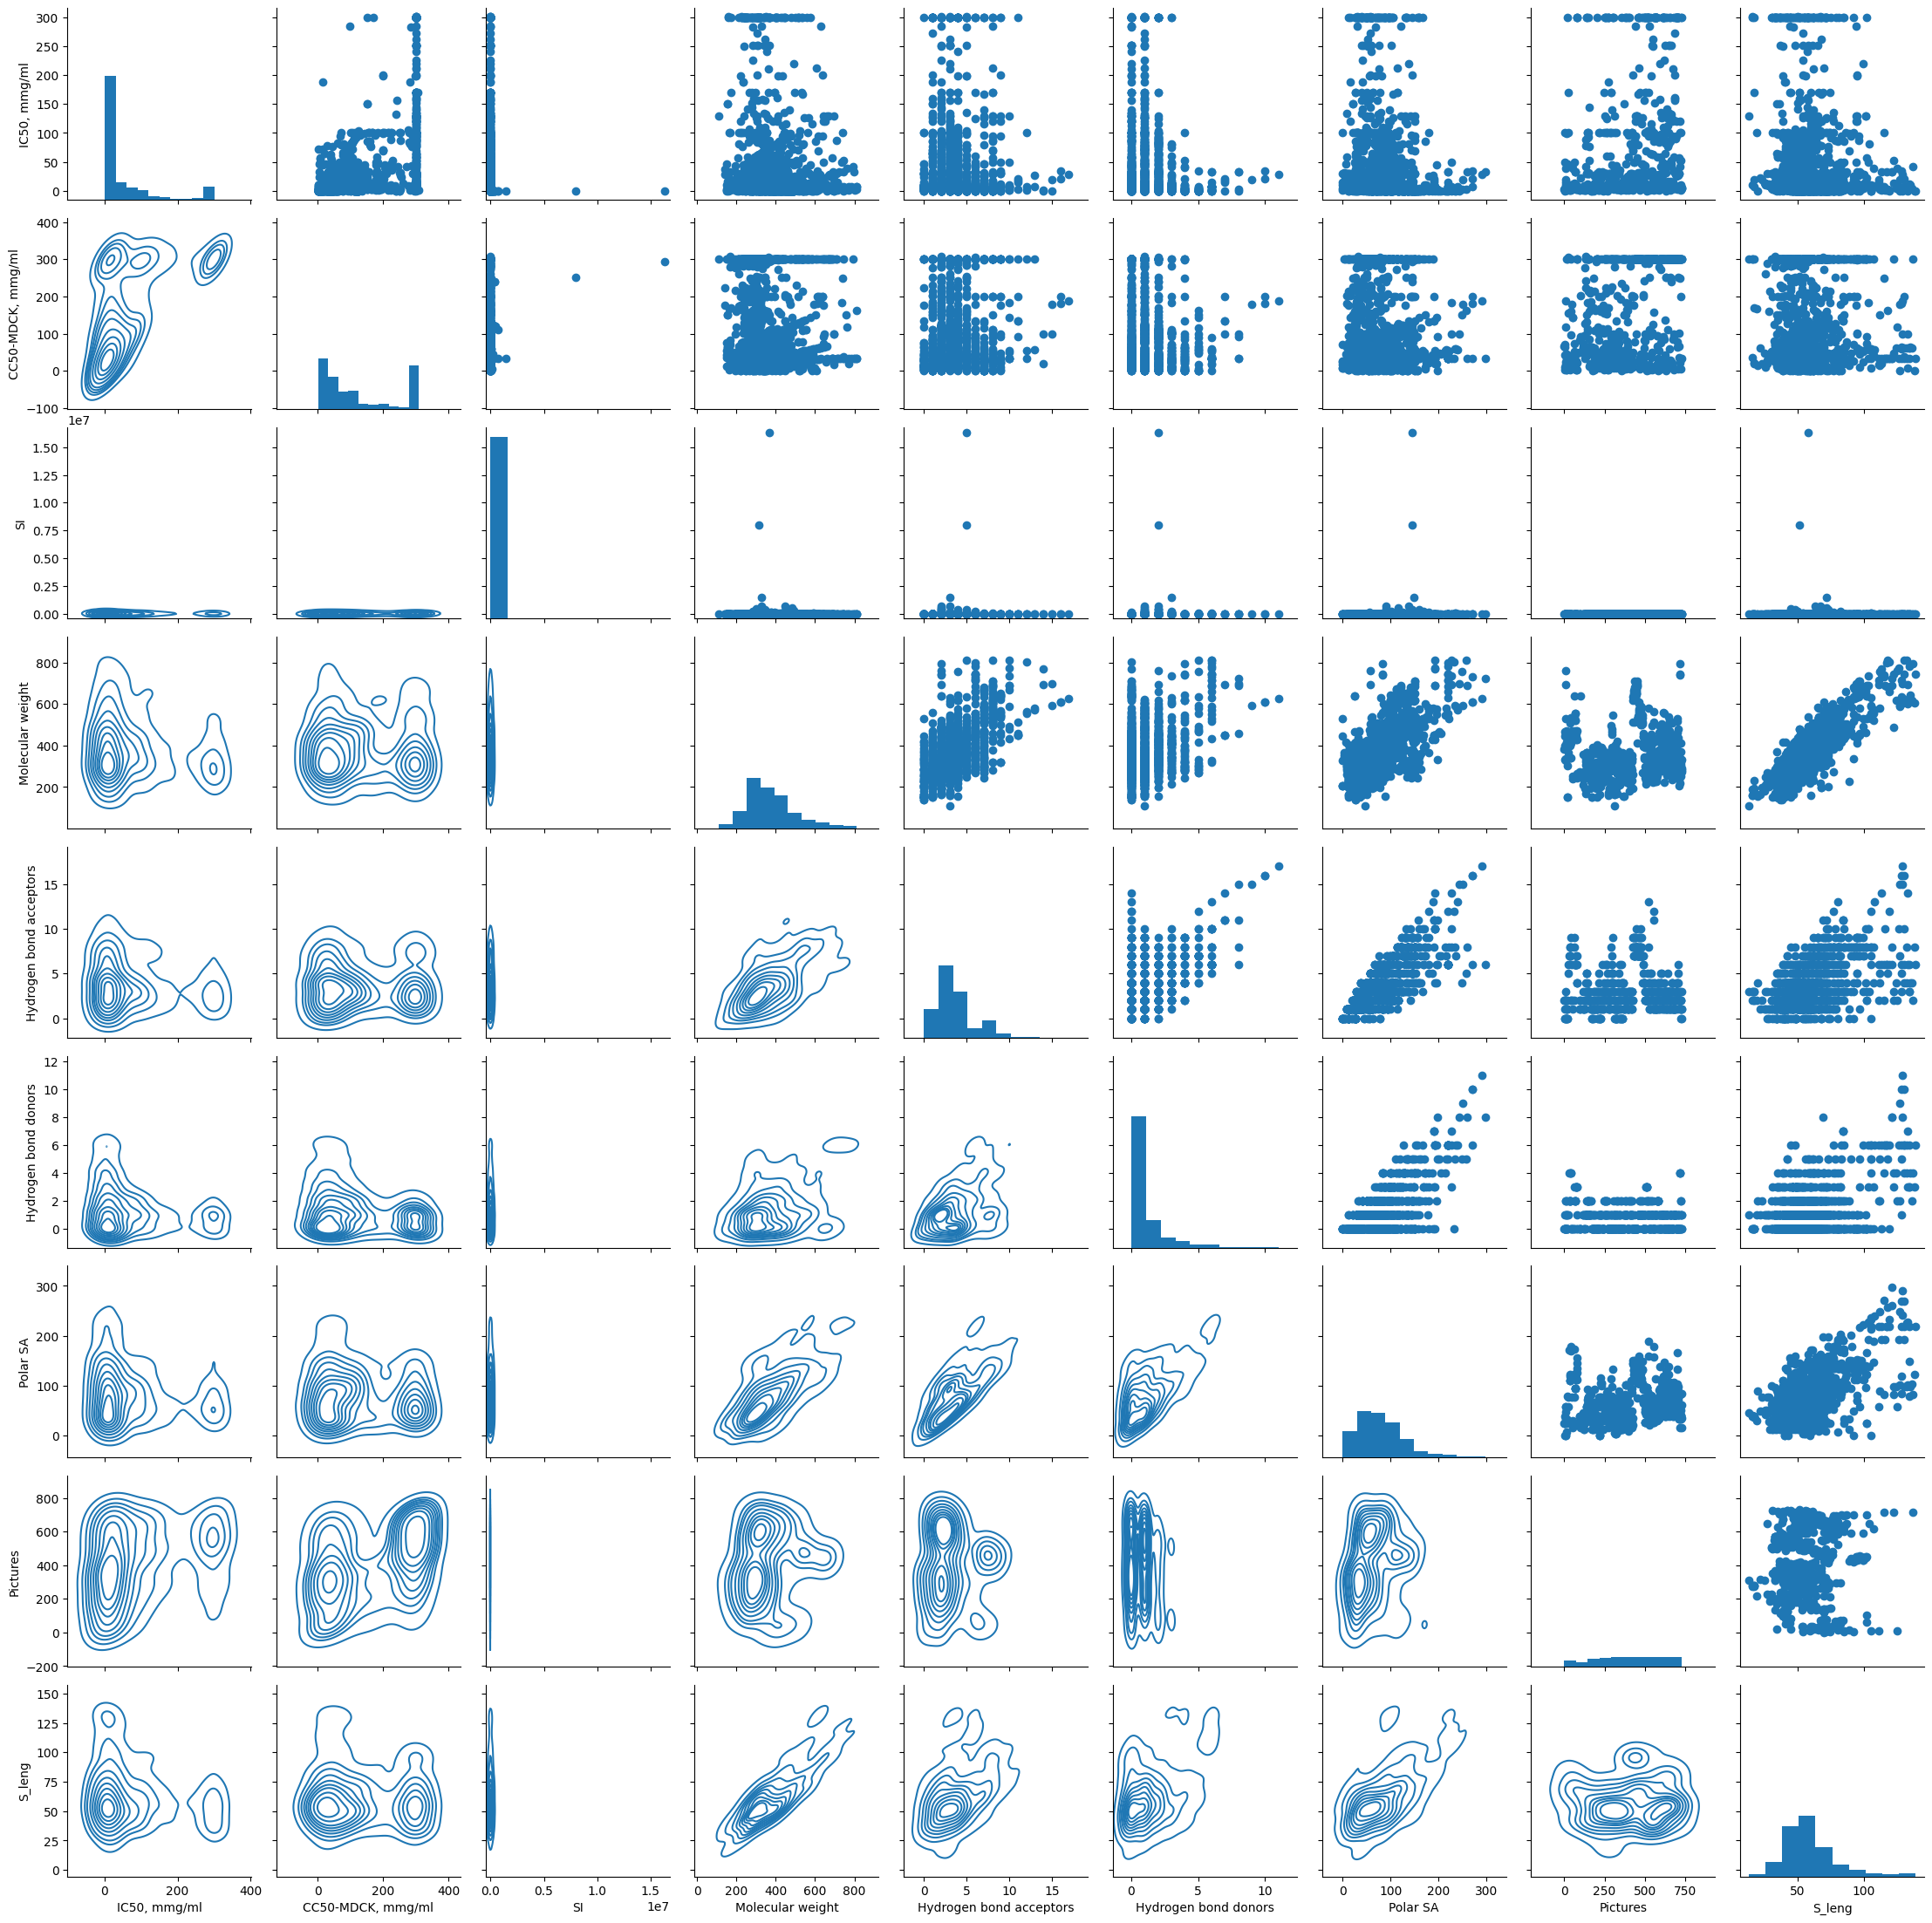

In [ ]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

<Axes: xlabel='Molecular weight', ylabel='S_leng'>

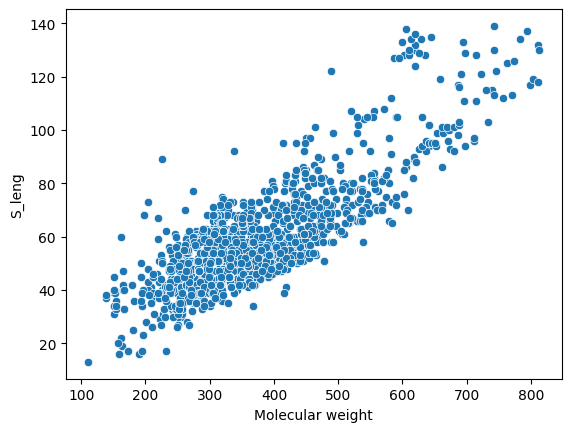

In [ ]:
sns.scatterplot(data = df, x = 'Molecular weight', y = 'S_leng')

<Axes: xlabel='S_leng', ylabel='Count'>

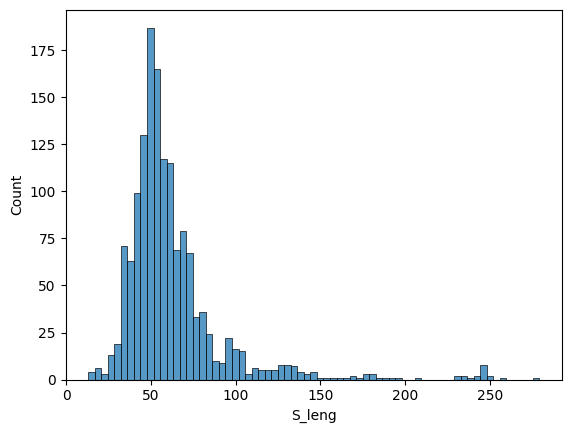

In [ ]:
 sns.histplot(df['S_leng'])

In [ ]:
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 Title                        0
IC50, mmg/ml                 0
CC50-MDCK, mmg/ml            0
SI                           0
Molecular weight             0
Hydrogen bond acceptors      0
Hydrogen bond donors         0
Polar SA                     0
SMILES                       0
Pictures                   741
S_leng                       0
dtype: int64


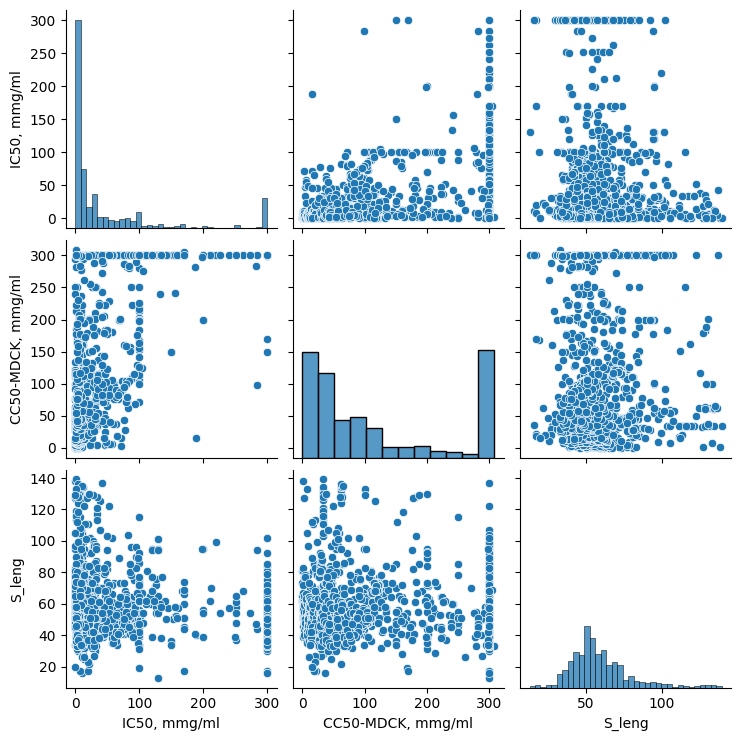

In [ ]:
columns = ['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'S_leng']
sns.pairplot(df[columns])
plt.show()

Text(0, 0.5, 'CC50-MDCK, mmg/ml')

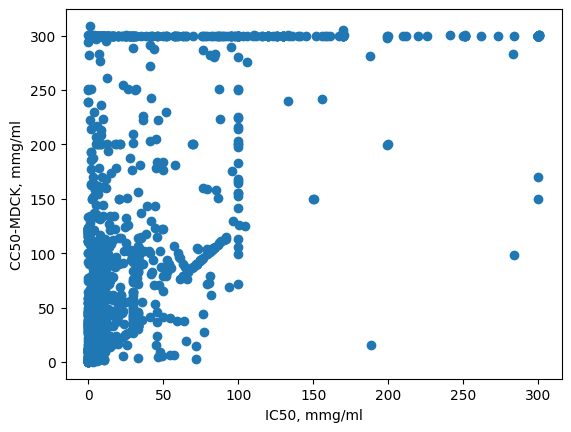

In [ ]:
plt.figure()
plt.scatter(df['IC50, mmg/ml'], df['CC50-MDCK, mmg/ml'])
plt.xlabel('IC50, mmg/ml')
plt.ylabel('CC50-MDCK, mmg/ml')

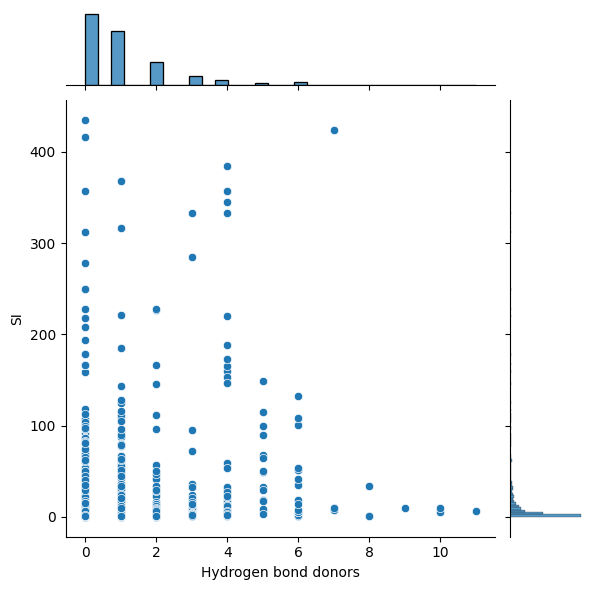

In [ ]:
sns.jointplot(x='Hydrogen bond donors', y='SI', data=df_v)

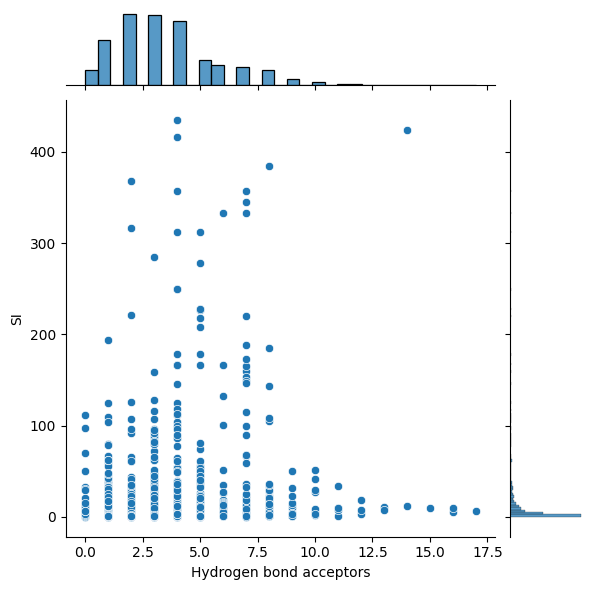

In [ ]:
sns.jointplot(x='Hydrogen bond acceptors', y='SI', data=df_v)

In [ ]:
df_v = df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'S_leng']]
df_v = df_v[df_v.SI < 500]
df_v = df_v[df_v.S_leng < 140]
df_v.describe()

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,S_leng
count,1204.000000,1204.000000,1204.000000,1204.00000,1204.000000,1204.000000,1204.000000,1204.000000
mean,49.176177,123.176052,21.402693,371.75515,3.617110,1.141196,76.299302,58.545681
std,80.668510,114.412988,50.589507,122.84266,2.448554,1.500899,46.220507,20.006244
min,0.004219,0.031928,0.000000,111.10100,0.000000,0.000000,0.000000,13.000000
25%,3.000000,27.500000,1.654375,285.47700,2.000000,0.000000,40.710000,46.000000
50%,11.100000,76.550000,4.325172,348.61900,3.000000,1.000000,69.650000,54.000000
75%,54.925000,277.750000,15.750000,432.72800,5.000000,2.000000,99.390000,65.000000
max,300.500000,309.000000,434.800000,812.92500,17.000000,11.000000,296.980000,139.000000


In [ ]:
df.groupby('Hydrogen bond acceptors')['IC50, mmg/ml'].mean()

Hydrogen bond acceptors
0     19.053846
1     53.349178
2     53.041978
3     64.424722
4     37.600635
5     41.894755
6     28.477847
7     32.920979
8     46.550271
9     62.710586
10    22.390000
11    71.120000
12    36.233333
13    17.450000
14     0.950000
15     9.413933
16    27.750000
17    27.700000
Name: IC50, mmg/ml, dtype: float64

In [ ]:
df.groupby('Hydrogen bond donors')['IC50, mmg/ml'].mean()

Hydrogen bond donors
0     45.185215
1     66.084458
2     42.407755
3     20.670131
4      7.288806
5      3.441161
6      6.412589
7     13.275000
8     17.381967
9     18.800000
10    27.750000
11    27.700000
Name: IC50, mmg/ml, dtype: float64

In [ ]:
df.corr()

<ipython-input-244-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,Pictures,S_leng
"IC50, mmg/ml",1.000000,0.612599,-0.028820,-0.086393,-0.050751,-0.127120,-0.076050,0.269334,-0.086489
"CC50-MDCK, mmg/ml",0.612599,1.000000,0.048933,-0.027514,-0.001261,-0.171752,-0.060730,0.405085,-0.010180
SI,-0.028820,0.048933,1.000000,-0.005947,0.018043,0.025154,0.063440,-0.089633,-0.001850
Molecular weight,-0.086393,-0.027514,-0.005947,1.000000,0.616594,0.322256,0.691360,0.134170,0.823220
Hydrogen bond acceptors,-0.050751,-0.001261,0.018043,0.616594,1.000000,0.488121,0.759983,0.008937,0.510995
Hydrogen bond donors,-0.127120,-0.171752,0.025154,0.322256,0.488121,1.000000,0.661755,-0.095095,0.395150
Polar SA,-0.076050,-0.060730,0.063440,0.691360,0.759983,0.661755,1.000000,0.184456,0.608004
Pictures,0.269334,0.405085,-0.089633,0.134170,0.008937,-0.095095,0.184456,1.000000,0.017436
S_leng,-0.086489,-0.010180,-0.001850,0.823220,0.510995,0.395150,0.608004,0.017436,1.000000


<ipython-input-157-43e13db4cca3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


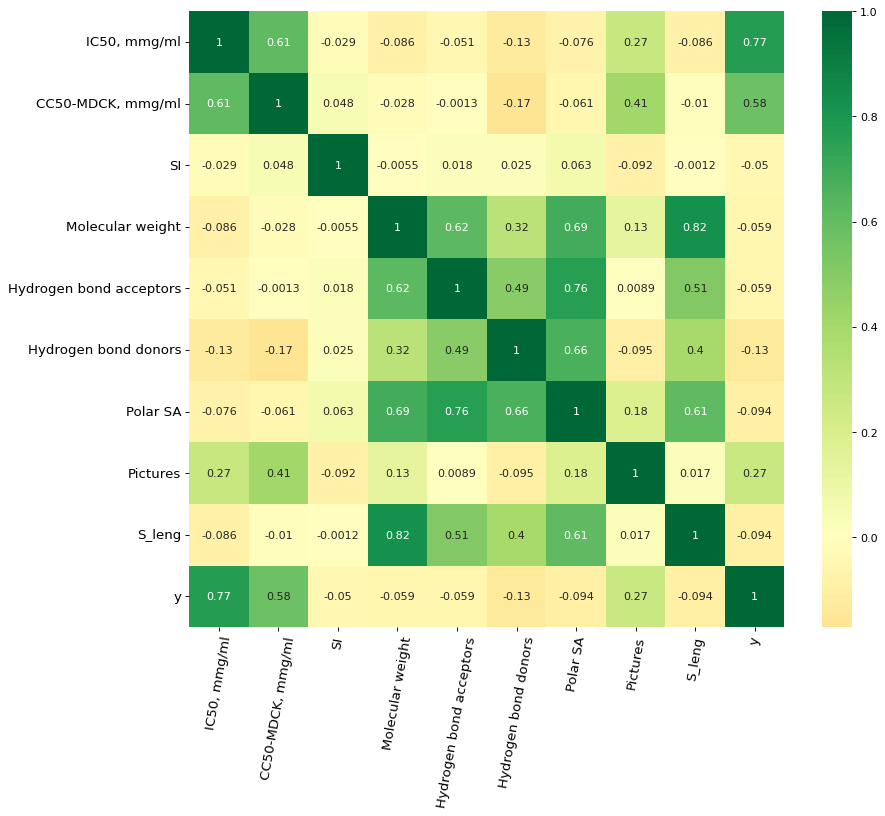

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.xticks(fontsize=12, rotation = 80)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# sns.boxplot(df['Polar SA'])
# sns.boxplot(df['IC50, mmg/ml'])

In [ ]:
df

NameError: ignored

Vectorizer

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "Molecule")
df[["SMILES","Molecule"]]

,SMILES,Molecule
2,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x786375dd8a50>
4,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,<rdkit.Chem.rdchem.Mol object at 0x786375dd9690>
13,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N\CC[N+](CC)(CC)...,<rdkit.Chem.rdchem.Mol object at 0x786375dd8b30>
14,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N/CCOC(=O)CCC(=O...,<rdkit.Chem.rdchem.Mol object at 0x7863781d2960>
15,CC(=O)C(C1=O)=C(O)C=C2Oc(c3[C@@]12C)c4c(c(C)c3...,<rdkit.Chem.rdchem.Mol object at 0x7863781d2420>
...,...,...
1450,CC(C)CCCCc1c(O)c(C)c(=O)oc1,<rdkit.Chem.rdchem.Mol object at 0x78637462bf40>
1451,CCC[C@@H](C[C@@]1(C)O)O[C@@H]([C@H]12)C[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x78637462c040>
1453,C[C@@]1(O)CC(C)(C)O[C@@H]([C@H]12)C[C@H](C)CC2,<rdkit.Chem.rdchem.Mol object at 0x78637462c0b0>
1457,CCOC(=O)CN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x78637462c120>


In [ ]:
# mols =  [Chem.MolFromSmiles(smile) for smile in df["SMILES"]]
# mols

In [ ]:
!python -m pip install git+https://github.com/EBjerrum/molvecgen

  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-jfucv0mp
  Running command git clone --filter=blob:none --quiet https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-jfucv0mp
  Resolved https://github.com/EBjerrum/molvecgen to commit f81d5aade18bea60882f5845877f6283366bbe91
  Preparing metadata (setup.py) ... done


In [ ]:
from molvecgen.vectorizers import SmilesVectorizer

smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(df.Molecule.values)


In [ ]:
mol_vects = smivec.transform(mols)
mol_vects.shape

(1303, 137, 40)

In [ ]:
y = df['IC50, mmg/ml'].values.reshape((-1,1))
# X = df.Molecule.values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

# #Normalizing output using standard scaling
# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)
# y_validation = scaler.transform(y_validation)


In [ ]:
y.shape

(1468, 1)

In [ ]:
print(y[:10])

[[ 9.9]
 [39.4]
 [13.5]
 [50. ]
 [ 6.4]
 [11. ]
 [11. ]
 [33. ]
 [33. ]
 [33. ]]


In [ ]:
print(y_train[:10])

[[-0.21542791]
 [-0.47274334]
 [ 1.36522398]
 [-0.29997441]
 [-0.5744442 ]
 [ 3.09291325]
 [ 3.09291325]
 [-0.47274334]
 [ 3.09291325]
 [-0.54993797]]


In [ ]:
print(X)

 <rdkit.Chem.rdchem.Mol object at 0x786375dd8b30> ...


In [ ]:
class SMILESMolDataset(Dataset):
    def __init__(self, molecules, y, vectorizer):
        self.molecules = molecules
        self.y = y
        self.vectorizer = vectorizer
    def __len__(self):
        return len(self.molecules)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mols = self.molecules[idx]

        #The vectorizer was written to work with batches,
        #but PyTorch datasets unfortunately works with single samples
        sample = self.vectorizer.transform([mols])[0]
        label = self.y[idx]
        return sample, label

In [ ]:
train_dataset = SMILESMolDataset(X_train, y_train, smivec)
print(train_dataset[9])

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int8), array([-0.54993797]))


In [ ]:
y = df['IC50, mmg/ml'].values.reshape((-1,1))
X = smivec.transform(df.Molecule.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)


In [ ]:
print(X[:2, :, :1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score


from sklearn.ensemble import RandomForestClassifier
import numpy as np

print(X_train)

# Создаем трехмерный вектор
X = np.array([[0.5, 0.2, 0.7],
              [0.3, 0.8, 0.4],
              [0.9, 0.6, 0.1]])

print(X)

# Создаем метки классов
y = np.array([0, 1, 1])

# Создаем экземпляр классификатора случайного леса и обучаем его на данных
clf = RandomForestClassifier(n_estimators=100)  # Количество деревьев = 100
clf.fit(X, y)

# Пример классификации нового трехмерного вектора
new_vector = np.array([[0.4, 0.1, 0.9]])  # Новый трехмерный вектор
predicted_class = clf.predict(new_vector)  # Классификация нового вектора

print("Predicted class:", predicted_class)

# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# display(rfc.score(X_train, y_train))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]]
[[0.5 0.2 0.7]
 [0.3 0.8 0.4]
 [0.9 0.6 0.1]]
Predicted class: [1]


PCA

Random Forest

In [ ]:
from sklearn.decomposition import PCA


y = df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI']].values.reshape((-1,1))
X = df.Molecule.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

# Y_ = [df['IC50, mmg/ml'].values, df['CC50-MDCK, mmg/ml'].values,	df['SI'].values]
# Y_ = df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI']]
# print(Y_)
pca = PCA(n_components = 1, copy = True)
components = pca.fit(y_train)
# explained_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)
# [0.9924... 0.0075...]
print(pca.singular_values_)
# [6.30061... 0.54980...]

ValueError: ignored

In [ ]:
components.shape

In [ ]:
# Построить диаграмму рассеяния для точек в пространтве из двух главных компонент

plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], cmap='viridis')
plt.title('Диаграмма рассеяния для двух главных компонент')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

In [ ]:
from statsmodels.multivariate.factor import Factor

In [17]:
mas = []
for x in df['IC50, mmg/ml']:
  if (x < 8):
      mas.append(0)
  elif (8 <= x <= 250):
    mas.append(1)
  else:
    mas.append(2)
df['y'] = mas

In [23]:
mas2 = []
for x in df['CC50-MDCK, mmg/ml']:
  if (x >= 8):
      mas2.append(0)
  else:
      mas2.append(1)
df['z'] = mas2

In [16]:
df['y'] = [0. if x < 8 else 1. for x in df['IC50, mmg/ml']]

<8 BAD

8<25 NORM
>25 Very **GOOD**

In [48]:
df

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures,S_leng,y,z
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0,41,1,0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0,44,1,0
13,1018-As-105,13.5,73.0,5.407407,641.133,2,0,24.72,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N\CC[N+](CC)(CC)...,63.0,102,1,0
14,1019-YA-214,50.0,41.5,0.830000,472.674,6,0,77.32,CC1(C)[C@H](CC2)CC(\[C@@]12C)=N/CCOC(=O)CCC(=O...,64.0,82,1,0
15,1031-ОЛ7-144-1,6.4,53.0,8.281250,431.406,8,2,123.02,CC(=O)C(C1=O)=C(O)C=C2Oc(c3[C@@]12C)c4c(c(C)c3...,65.0,68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,CHEMBL4245559,12.8,261.0,20.390625,210.275,3,1,50.44,CC(C)CCCc1c(O)c(C)c(=O)oc1,NaN,26,1,0
1448,CHEMBL3040734,29.1,176.3,6.058419,139.243,0,0,26.02,C[C@H](N)[C@H]([C@H]12)C[C@@H](C1)CC2,NaN,37,1,0
1449,CHEMBL3236446,36.7,222.5,6.062670,139.243,0,0,26.02,C[C@@H](N)[C@H]([C@H]12)C[C@@H](C1)CC2,NaN,38,1,0
1450,CHEMBL4240078,29.7,288.5,9.713805,224.303,3,1,50.44,CC(C)CCCCc1c(O)c(C)c(=O)oc1,NaN,27,1,0


In [ ]:
c = 0
v = 0
for i in df['IC50, mmg/ml']:
  if i < 8:
    c += 1
  elif 8 <= i <= 250:
    v += 1
print(c)
print(v)
print(1303 - c - v)

574
633
96


In [ ]:
df['IC50, mmg/ml'].describe()

count    1303.000000
mean       47.307542
std        80.473348
min         0.000010
25%         2.400000
50%        10.000000
75%        50.000000
max       300.500000
Name: IC50, mmg/ml, dtype: float64

#Сравнение моделей

**RandomForestClassifier**

In [47]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Функция для векторизации химических формул с использованием RDKit
def vectorize_formula(formula):
    mol = Chem.MolFromSmiles(formula)  # Преобразование формулы в молекулу с помощью SMILES
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Генерация битового отпечатка молекулы
        return list(fingerprint)
    else:
        return [0] * 2048  # Возврат нулевого вектора в случае ошибки

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values


arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


print("a", arr[0:10:1])
print(y)

clf = RandomForestClassifier(n_estimators=40, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")




a [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 




RandomForestRegressor

In [46]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Функция для векторизации химических формул с использованием RDKit
def vectorize_formula(formula):
    mol = Chem.MolFromSmiles(formula)  # Преобразование формулы в молекулу с помощью SMILES
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Генерация битового отпечатка молекулы
        return list(fingerprint)
    else:
        return [0] * 2048  # Возврат нулевого вектора в случае ошибки

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['IC50, mmg/ml'].values.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


print("a", arr[0:10:1])
print(y)

clr = RandomForestRegressor(n_estimators=100, random_state=42)
clr.fit(x_train, y_train)

y_pred = clr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")



a [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-46-c5f3b5fad150>:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr.fit(x_train, y_train)


Среднеквадратичная ошибка: 694.921459243683


Регрессия

In [45]:
# Разбить исходную выборку на обучающую и тестовую (70% первых строк включить в обучающую выборку, оставшиеся строки – в тестовую)
# Обучить простейшую линейную регрессионную модель со свободным членом методом наименьших квадратов

from sklearn.linear_model import LinearRegression


# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['IC50, mmg/ml'].values.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# creating a regression model
model = LinearRegression()
model.fit(x_train, y_train)

# y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")


(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание модели k-NN с k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Обучение модели на обучающей выборке
knn.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = knn.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Точность модели: 0.7346938775510204
Среднеквадратичная ошибка: 0.2653061224489796


*Метод* опорных векторов

In [43]:
from sklearn.svm import SVC

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# # Нормализация данных
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Создание модели SVM с линейным ядром
svm_classifier = SVC(kernel='linear')

# Обучение модели на обучающей выборке
svm_classifier.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_classifier.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Нейронная сеть

In [40]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



# Создание нейронной сети
model = keras.Sequential([
    keras.layers.Input(shape=(2048,)),  # Входной слой с 4 признаками
    keras.layers.Dense(200, activation='relu'),  # Скрытый слой с 64 нейронами и функцией активации ReLU
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Выходной слой с 3 нейронами (по количеству классов) и функцией активации softmax
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Оценка качества модели на тестовой выборке
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание модели градиентного бустинга с деревьями решений
gboost_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Обучение модели на обучающей выборке
gboost_classifier.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = gboost_classifier.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1303,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import xgboost as xgb

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание DMatrix (оптимизированный формат данных для XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Определение параметров модели XGBoost
params = {
    'objective': 'multi:softmax',  # Задача классификации с множеством классов
    'num_class': 3,  # Количество классов
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'mlogloss'
}

# Обучение модели XGBoost
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(dtest)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1303,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Градиентный бустинг для регрессии


In [ ]:
import xgboost as xgb

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values


arr = []

for i in aaaaaa:
  arr.append(i)

y = df['IC50, mmg/ml'].values.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


# Создание DMatrix (оптимизированный формат данных для XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Определение параметров модели XGBoost для регрессии
params = {
    'objective': 'reg:squarederror',  # Задача регрессии
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'rmse'  # Корень из средней квадратичной ошибки
}

# Обучение модели XGBoost
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(dtest)

# Оценка качества модели (среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1303,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Регрессия с поддержкой векторов

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values


arr = []

for i in aaaaaa:
  arr.append(i)

y = df['IC50, mmg/ml'].values.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание модели Support Vector Regression
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Обучение модели на данных
svr_rbf.fit(x_train, y_train)

# Предсказание с использованием модели
y_pred = svr_rbf.predict(x_test)

# Оценка качества модели (среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1303,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Среднеквадратичная ошибка: 4179.188042529558


Обучение столбца CC50

**RandomForestClassifier**





In [25]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Функция для векторизации химических формул с использованием RDKit
def vectorize_formula(formula):
    mol = Chem.MolFromSmiles(formula)  # Преобразование формулы в молекулу с помощью SMILES
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Генерация битового отпечатка молекулы
        return list(fingerprint)
    else:
        return [0] * 2048  # Возврат нулевого вектора в случае ошибки

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['z'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)



clf = RandomForestClassifier(n_estimators=40, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")




(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

**RandomForestRegressor**

In [32]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Функция для векторизации химических формул с использованием RDKit
def vectorize_formula(formula):
    mol = Chem.MolFromSmiles(formula)  # Преобразование формулы в молекулу с помощью SMILES
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Генерация битового отпечатка молекулы
        return list(fingerprint)
    else:
        return [0] * 2048  # Возврат нулевого вектора в случае ошибки

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['CC50-MDCK, mmg/ml'].values.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


print("a", arr[0:10:1])
print(y)

clr = RandomForestRegressor(n_estimators=100, random_state=42)
clr.fit(x_train, y_train)

y_pred = clr.predict(x_test)


print("a1", y_test[0])
print("a2", y_pred[0])


mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")



(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-32-c2427b850cf3>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr.fit(x_train, y_train)


a1 [300.]
a2 38.14900000000004
Среднеквадратичная ошибка: 6510.967430760652


**KNeighborsClassifier**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['z'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание модели k-NN с k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Обучение модели на обучающей выборке
knn.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = knn.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

*Метод* опорных векторов

In [35]:
from sklearn.svm import SVC

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['z'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


# Создание модели SVM с линейным ядром
svm_classifier = SVC(kernel='linear')

# Обучение модели на обучающей выборке
svm_classifier.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = svm_classifier.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Градиентный бустинг

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['z'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Создание модели градиентного бустинга с деревьями решений
gboost_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Обучение модели на обучающей выборке
gboost_classifier.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = gboost_classifier.predict(x_test)

# Оценка качества модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Нейронная сеть

In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


# Применяем функцию векторизации к формулам
aaaaaa = df['SMILES'].apply(vectorize_formula)
aaaaaa = aaaaaa.values
print(aaaaaa.shape)
print(aaaaaa)

arr = []

for i in aaaaaa:
  arr.append(i)

y = df['z'].values

x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание нейронной сети
model = keras.Sequential([
    keras.layers.Input(shape=(2048,)),  # Входной слой с 4 признаками
    keras.layers.Dense(200, activation='relu'),  # Скрытый слой с 64 нейронами и функцией активации ReLU
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Выходной слой с 3 нейронами (по количеству классов) и функцией активации softmax
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Оценка качества модели на тестовой выборке
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Точность модели: {accuracy}")

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

(1176,)
[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0